In [1]:
# Inverse, Contrast stretching, Histogram equalization, Thresholding, Add/Subtract

import numpy as np
import cv2
import matplotlib.pyplot as plt

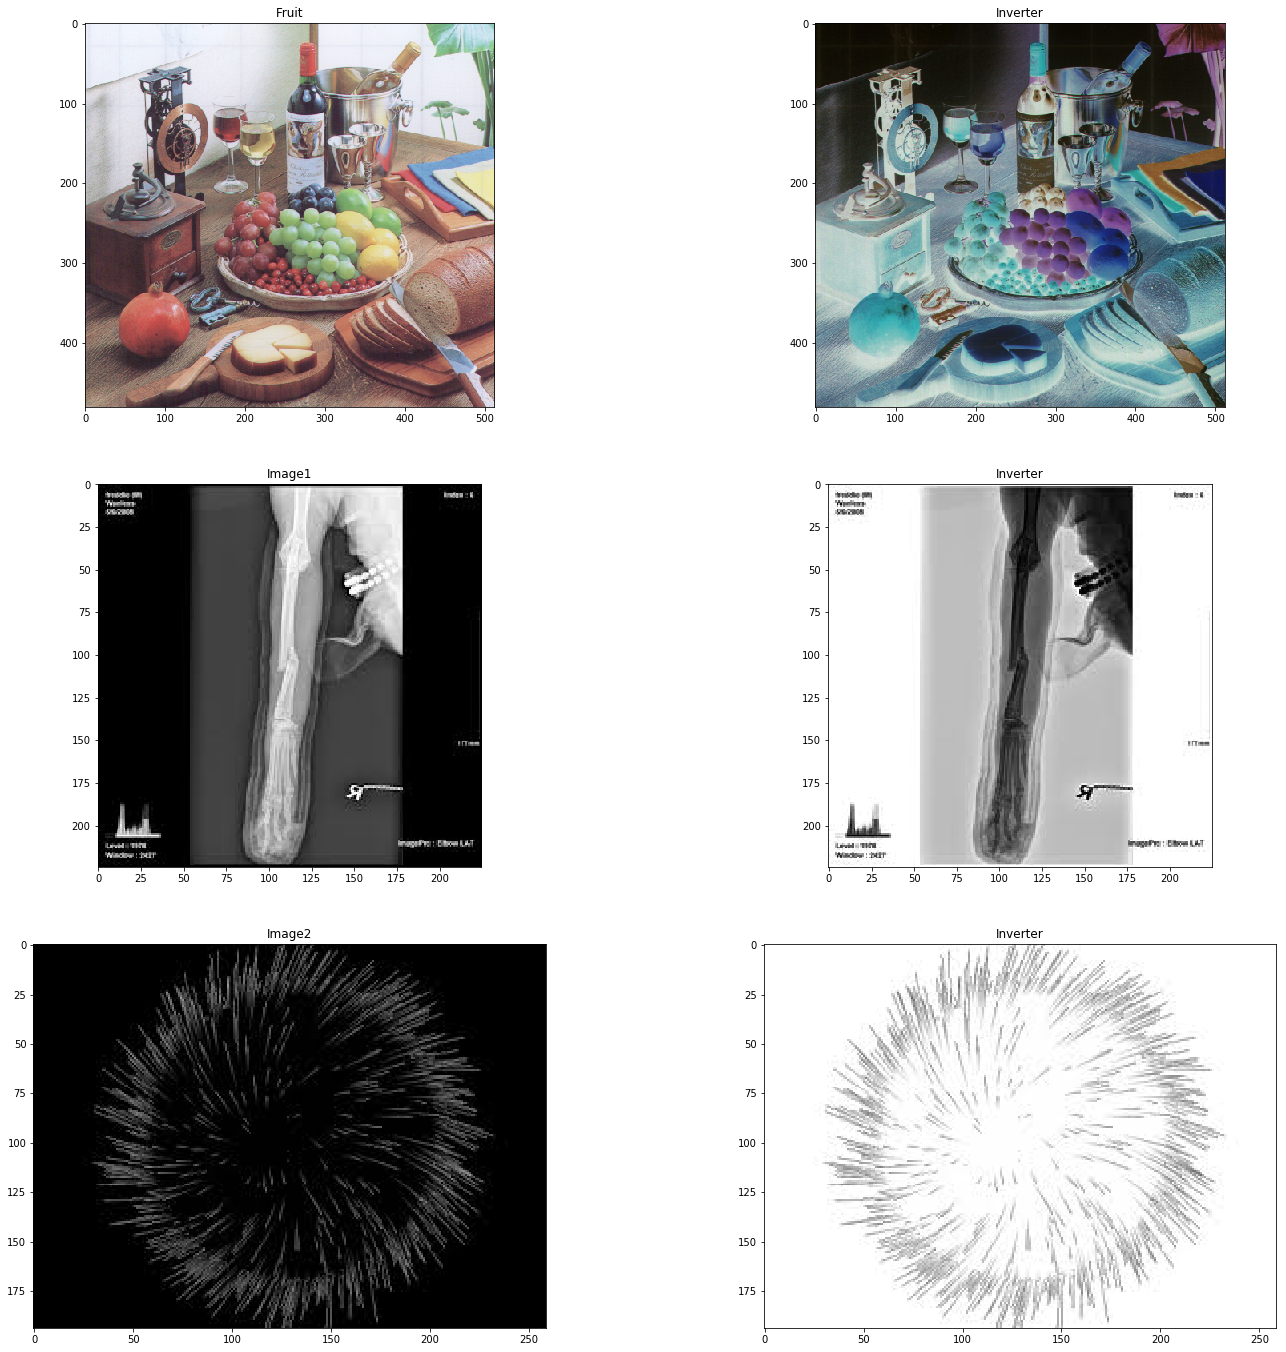

In [20]:
########### Inverse ###################

fruit = cv2.imread("./problem1/FRUIT.bmp")
fruit = cv2.cvtColor(fruit, cv2.COLOR_BGR2RGB)

img1 = cv2.imread("./problem1/anotherSample/ex2.jpg")

img2 = cv2.imread("./problem1/anotherSample/ex3.jpg")


plt.figure(figsize=(24,24))

#Fruit
plt.subplot(3,2,1)
plt.title("Fruit")
plt.imshow(fruit, vmin=0, vmax=255)

fruit_inverted = 255 - fruit

plt.subplot(3,2,2)
plt.title("Inverter")
plt.imshow(fruit_inverted, vmin=0, vmax=255)

#Image1
plt.subplot(3,2,3)
plt.title("Image1")
plt.imshow(img1, vmin=0, vmax=255)

img1_inverted = 255 - img1

plt.subplot(3,2,4)
plt.title("Inverter")
plt.imshow(img1_inverted, vmin=0, vmax=255)

#Image2
plt.subplot(3,2,5)
plt.title("Image2")
plt.imshow(img2, vmin=0, vmax=255)

img2_inverted = 255 - img2

plt.subplot(3,2,6)
plt.title("Inverter")
plt.imshow(img2_inverted, vmin=0, vmax=255)

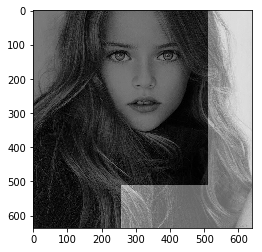

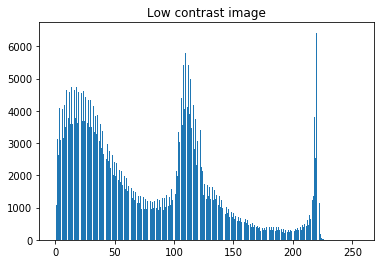

In [21]:
######################### Contrast stretching ##############################
### make_hist 함수
### 입력: grayscale 이미지
### 출력: histogram 배열
### 기능 grayscale 이미지를 입력받아 histogram [0~255]을 계산하고 return 해주는 함수

def make_hist(image):
    
    #입력 영상이 None이거나 3차원(h, w, c)이면 assert
    assert len(image.shape) == 2, "grayscale 영상을 입력해주세요."
    
    #변수 선언
    histogram = np.zeros((256), dtype=np.int32) # 0~255값을 저장할 array 생성(0으로 초기화)
    h, w = image.shape
    
    #모든 픽셀을 탐색하며 histogram 계산
    for i in range(h):
        for j in range(w):
            value = image[i,j]
            histogram[value] += 1
    
    return histogram

#저대비(low constrast) 영상 불러오기
lya_before = cv2.imread("./problem1/anotherSample/ex5_mix.jpg", 0)
h, w = np.shape(lya_before)
plt.imshow(lya_before, cmap='gray', vmin=0, vmax=255)

# 저대비 영상의 히스토그램 출력
plt.figure()
lya_hist = make_hist(lya_before)
x = np.arange(256) #0~255
plt.bar(x, height=lya_hist) # 막대그래프 그리기
plt.title("Low contrast image")
plt.show()

#cv2.imwrite("./problem1/result/ex16(origin).png", lya_after)

최소 밝기: 5
최대 밝기: 250
slope: 1.0408163265306123
(max-min)*slope: 255.0


<BarContainer object of 256 artists>

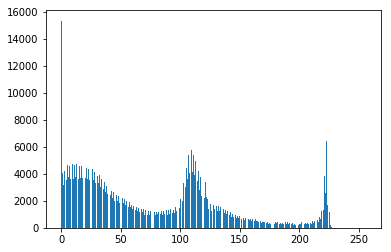

In [32]:
# 노이즈에 강건한 최소, 최대 밝기 계산
# (픽셀 개수 5% 미만까지는 skip)

max_value = 0
min_value = 255

sum_low = 0
sum_high = 0
num_pixel = w * h # 픽셀 개수

#for i in np.arange(0,256,1):
#    freq = lya_hist[i]
#    sum_low += freq
#    if sum_low > num_pixel * 0.25:
#        min_value = i
#        break

#for i in np.arange(255,-1,-1):
#    freq = lya_hist[i]
#    sum_high += freq
#    if sum_high > num_pixel * 0.25:
#        max_value = i
#        break
min_value = 5
max_value = 250
print("최소 밝기:", min_value)
print("최대 밝기:", max_value)

#slope 계산
slope = 255 / (max_value - min_value)
print("slope:", slope)
print("(max-min)*slope:", (max_value - min_value) * slope)

# histogram streching 수행
lya_after = np.zeros((h, w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        value = lya_before[i,j]
        
        if value < min_value:
            pass
            #lya_after[i,j] = 0
        elif value > max_value:
            pass
            #lya_after[i,j] = 255
        else:
            lya_after[i,j] = np.uint8((value - min_value) * slope)

hhist = make_hist(lya_after)
x = np.arange(256) #0~255
plt.bar(x, height=hhist)


In [7]:
# 영상의 최소, 최대 밝기 계산
max_value = 0
min_value = 255

# 0 -> 255로 탐색하며 최소 밝기 찾기
for i in np.arange(0,256,1):
    freq = lya_hist[i]
    if freq != 0:
        min_value = i
        break
        
# 255 -> 0으로 탐색하며 최대 밝기 찾기
for i in np.arange(255,-1,-1):
    freq = lya_hist[i]
    if freq != 0:
        max_value = i
        break

print("최소 밝기:", min_value)
print("최대 밝기:", max_value)

#slope 계산
slope = 255 / (max_value - min_value)
print("slope:", slope)
print("(max-min)*slope:", (max_value - min_value) * slope)

# histogram streching 수행
lya_after = np.zeros((h, w), dtype=np.uint8)

for i in range(h):
    for j in range(w):
        value = lya_before[i,j]
        
        if value < min_value:
            lya_after[i,j] = 0
        elif value > max_value:
            lya_after[i,j] = 255
        else:
            lya_after[i,j] = np.uint8((value - min_value) * slope)

최소 밝기: 0
최대 밝기: 232
slope: 1.0991379310344827
(max-min)*slope: 254.99999999999997


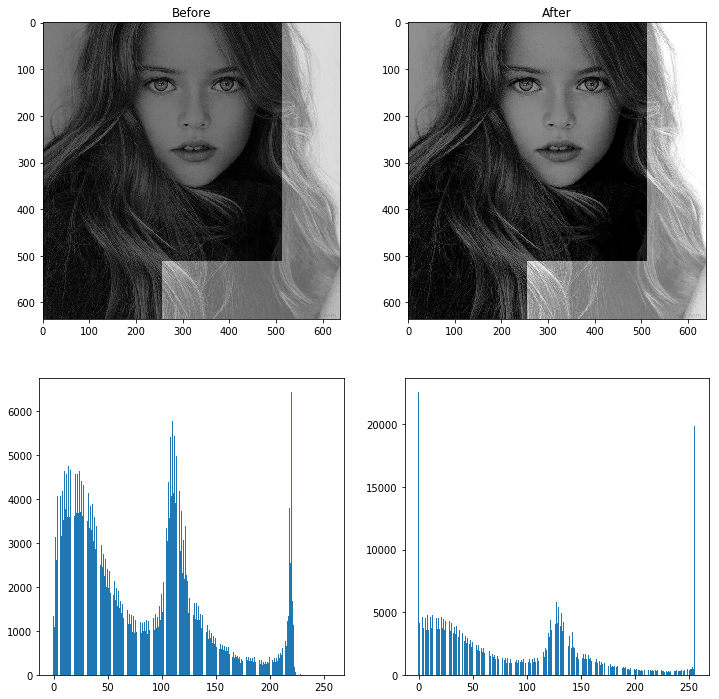

In [16]:
# 결과 영상 출력
plt.figure(figsize=(12,12)) #출력 크기 조절

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(lya_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(lya_after, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(lya_before)
x = np.arange(256) # 0~ 255
plt.bar(x, height=before_hist) #막대그래프 그리기

plt.subplot(2,2,4)
after_hist = make_hist(lya_after)
x = np.arange(256) #0~255
plt.bar(x, height=after_hist) # 막대그래프 그리기

plt.show()

# 결과 이미지 출력
#cv2.imwrite("./problem1/result/ContrastStretching/CS_result(ex16).png", lya_after)

영상 크기: 636 639
unit: 1587.515625


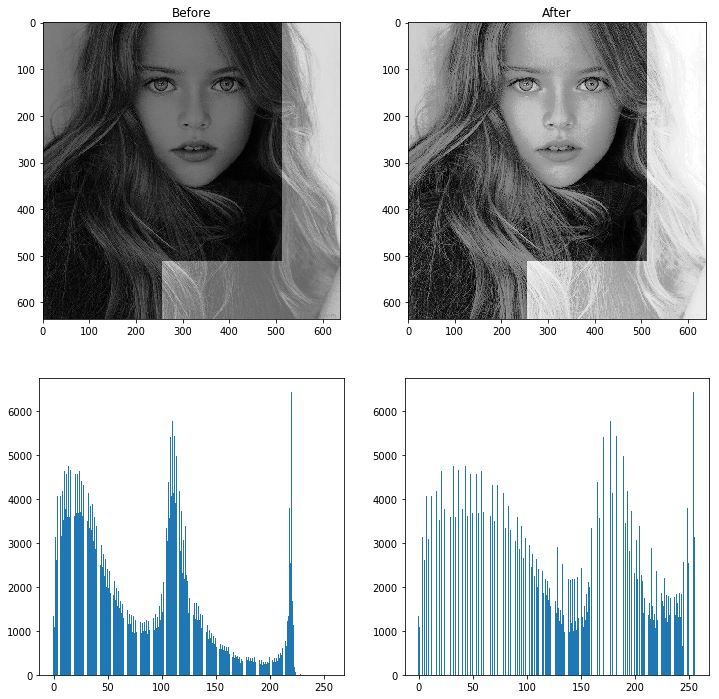

In [117]:
############################### Histogram Equalization ####################
# 저대비(low constrast) 영상 불러오기
ex_before = cv2.imread("./problem1/anotherSample/ex5_mix.jpg", 0)
h, w = np.shape(ex_before)

ex_after = np.zeros((h,w), dtype=np.uint8)

# 한 칸에 얼마의 값이 들어가야 하는지
unit = h * w / 256
print("영상 크기:", h, w)
print("unit:", unit)

# 히스토그램 계산
ex_hist = make_hist(ex_before)

# 변환 함수 만들기
T = np.zeros(256)
hist_sum = 0
for i in range(256):
    hist_sum += ex_hist[i]
    T[i] = np.uint8(hist_sum / unit)

#print("T:", T)

# Equalization 수행
for i in range(h):
    for j in range(w):
        value = ex_before[i,j]
        ex_after[i,j] = T[value] # 기본 밝기값 value가 H를 통해 매핑됨

# 결과 영상 출력
plt.figure(figsize=(12,12)) # 출력 크기 조절

plt.subplot(2,2,1)
plt.title("Before")
plt.imshow(ex_before, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.title("After")
plt.imshow(ex_after, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,3)
before_hist = make_hist(ex_before)
x = np.arange(256) #0~255
plt.bar(x, height=before_hist) #막대그래프 그리기

plt.subplot(2,2,4)
after_hist = make_hist(ex_after)
x = np.arange(256) # 0~255
plt.bar(x, height=after_hist) # 막대그래프 그리기

plt.show()

# 결과 이미지 저장
#cv2.imwrite("./problem1/result/HistogramEqualization/HE_result(ex5_br).jpg", ex_after)

Thresh_value:  160
Otsu 알고리즘이 찾아낸 임계치: 70.0


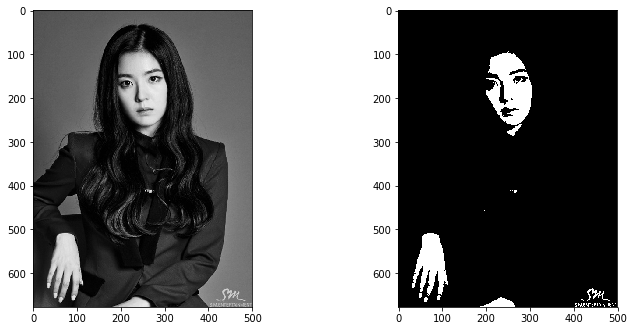

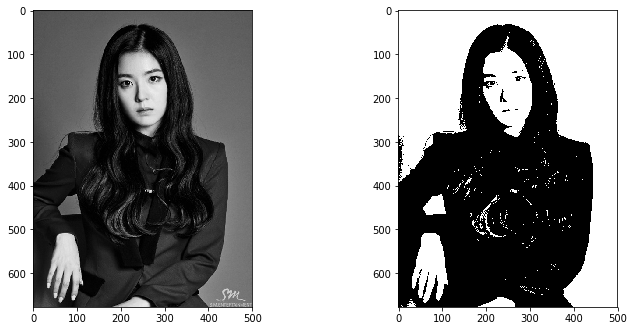

In [26]:
#################################### Thresholding ###############################
f_image = cv2.imread("./problem1/anotherSample/ex11.jpg", 0)
h,w = np.shape(f_image)

thresh_image = np.zeros((h,w), dtype=np.uint8)

#임계값 설정
thresh_value = 160

for i in range(h):
    for j in range(w):
        if f_image[i,j] >= thresh_value:
            thresh_image[i,j] = 255
        else:
            thresh_image[i,j] = 0

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(f_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,2)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)

print("Thresh_value: ", thresh_value)

#Otsu's method 적용
f_t_image = cv2.imread("./problem1/anotherSample/ex11.jpg", 0)
th, thresh_image = cv2.threshold(f_t_image, 0, 255, cv2.THRESH_OTSU)

print("Otsu 알고리즘이 찾아낸 임계치:", th)

plt.figure(figsize=(12,12))
plt.subplot(2,2,3)
plt.imshow(f_t_image, cmap='gray', vmin=0, vmax=255)

plt.subplot(2,2,4)
plt.imshow(thresh_image, cmap='gray', vmin=0, vmax=255)

alpha:  0.3


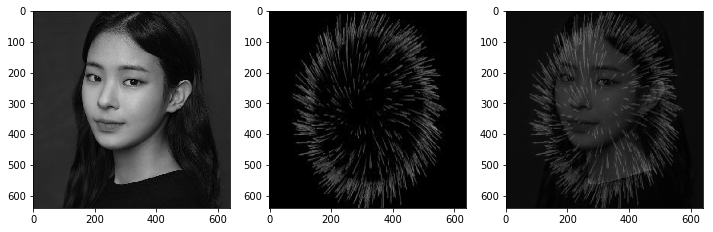

In [28]:
###################################### Add / Subtract ##########################
# 두 영상의 합성

img1 = cv2.imread("./problem1/anotherSample/ex10.jpg")
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

img2 = cv2.imread("./problem1/anotherSample/ex3_640.jpg")
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

alpha = 0.3 # alpha값을 자유롭게 조절
beta = 1 - alpha
mixed = (alpha * img1) + (beta * img2)
mixed = np.uint8(mixed)

print("alpha: ", alpha)

plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
plt.imshow(img1)
plt.subplot(1,3,2)
plt.imshow(img2)
plt.subplot(1,3,3)
plt.imshow(mixed)

img1 -  2  * img2


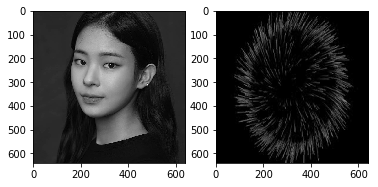

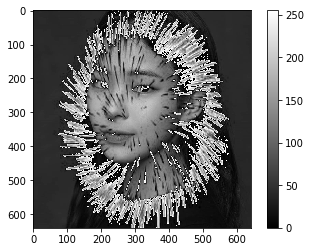

In [32]:
# 두 영상의 차

img1 = cv2.imread("./problem1/anotherSample/ex10.jpg", 0)
img2 = cv2.imread("./problem1/anotherSample/ex3_640.jpg", 0)

val = 2

img_diff = np.abs(img1 - val*img2)

print("img1 - ", val, " * img2")

plt.subplot(1,2,1)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.subplot(1,2,2)
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)

plt.figure()
plt.imshow(img_diff, cmap='gray', vmin=0, vmax=255)
plt.colorbar()

True

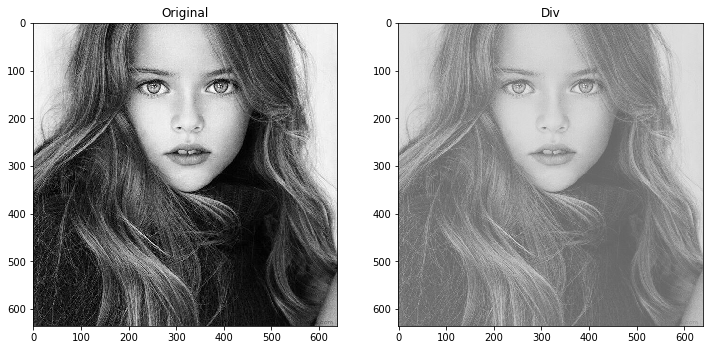

In [103]:
# grayscale 영상 밝기 변경(Saturated 또는 Clipping)

img_gray = cv2.imread("./problem1/anotherSample/ex5.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,12))

plt.subplot(1,3,1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')

#img_mul = np.int32(img_gray) * 2
#img_mul[img_mul > 255] = 255 # Overflow 현상이 일어나지 않게
#img_mul = np.uint8(img_mul)

#plt.subplot(1,3,2)
#plt.title("Mul (Saturated)")
#plt.imshow(img_mul, cmap='gray')

#나누기
img_div = img_gray / 2 + 100

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(img_gray, cmap='gray')

plt.subplot(1,2,2)
plt.title("Div")
plt.imshow(img_div, cmap='gray', vmin=0, vmax=255)

cv2.imwrite("./problem1/anotherSample/ex5_br.jpg", img_div)

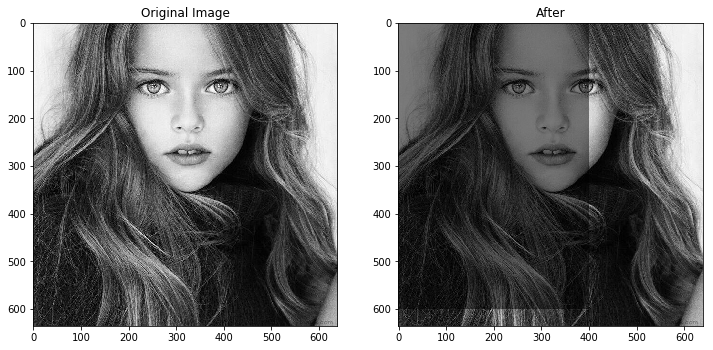

In [132]:
# grayscale 영상 밝기 변경(Saturated 또는 Clipping)

img_gray = cv2.imread("./problem1/anotherSample/ex5.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_gray, cmap='gray')

for i in range(0,600):
    for j in range(0,300):
        img_a[i,j] = img_gray[i,j] / 2

plt.subplot(1,2,2)
plt.title("After")
plt.imshow(img_a, cmap='gray', vmin=0, vmax=255)

#cv2.imwrite("./problem1/anotherSample/ex5_mix.jpg", img_div)